In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset
df = pd.read_csv("C:/Users/Admin/Downloads/Telecom/data/processed/cleaned_telco_data.csv")


# Ensure 'TotalCharges' is numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Handle missing values if any (optional: drop or fill)
df.dropna(subset=["TotalCharges"], inplace=True)

# Select features for segmentation
X_seg = df[["MonthlyCharges", "tenure", "TotalCharges"]]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_seg)


In [6]:
from sklearn.cluster import KMeans

# Create 4 clusters (you can tune this)
kmeans = KMeans(n_clusters=4, random_state=42)
df["Segment"] = kmeans.fit_predict(X_scaled)


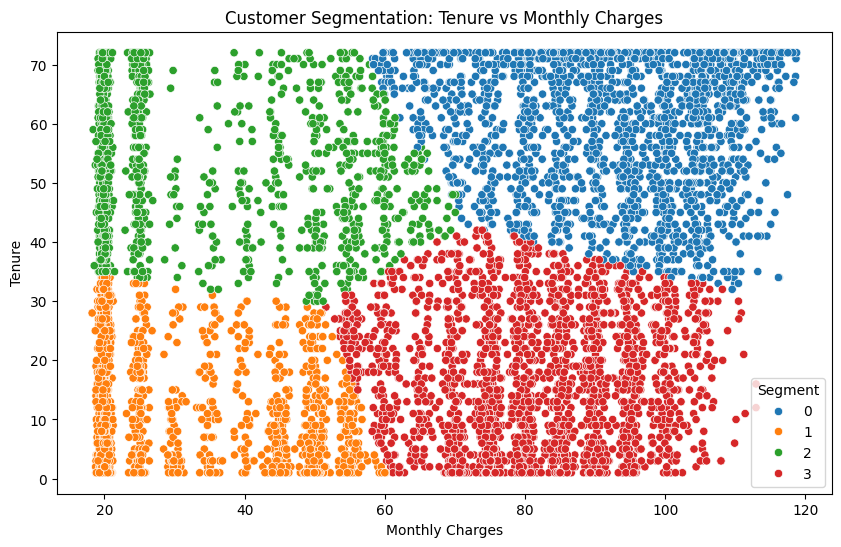

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="MonthlyCharges", y="tenure", hue="Segment", palette="tab10")
plt.title("Customer Segmentation: Tenure vs Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Tenure")
plt.legend(title="Segment")
plt.show()
